In [2]:
import pandas as pd
a='iherb_salesFINAL.csv'
df=pd.read_csv(a)
df

,Unnamed: 0,Name of product,Rating,Number of review,Price(tenge),Old price(tenge),Sold,Demand,Discount
0,6,"California Gold Nutrition, Sport, моногидрат к...",4.8,0.655780,0.422463,0.506956,1.000,0.000000,0.25
1,10,"California Gold Nutrition, NMN (никотинамид мо...",4.6,0.873885,0.280173,0.336208,1.000,0.000000,0.25
2,13,"California Gold Nutrition, Sport, моногидрат к...",4.8,0.655780,0.719671,0.863605,0.500,0.000000,0.25
3,15,"Maui Babe, Amazing Browning Lotion, лосьон для...",4.6,0.145073,0.378905,0.401193,0.250,0.112360,0.15
4,16,"California Gold Nutrition, Органическая львина...",4.7,0.184540,0.323293,0.342310,0.250,0.348315,0.15
...,...,...,...,...,...,...,...,...,...
778,907,"Culturelle, пробиотики, повышенная эффективнос...",4.7,0.019475,0.872310,0.872310,0.000,0.393258,0.25
779,908,"Aura Cacia, Ароматерапевтическая пенка для ван...",4.6,0.006980,0.065085,0.078103,0.005,0.224719,0.10
780,909,"NOW Foods, Pets, против аллергии, для кошек и ...",4.1,0.012021,0.559241,0.559241,0.000,0.191011,0.10
781,910,"Dasique, Палитра теней для век, 11 шоколадных ...",4.4,0.002930,0.547533,0.657039,0.000,0.280899,0.25


In [4]:
df.isnull().sum()

Unnamed: 0          0
Name of product     0
Rating              0
Number of review    0
Price(tenge)        0
Old price(tenge)    0
Sold                0
Demand              0
Discount            0
dtype: int64

In [6]:
df=df.drop('Name of product', axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Sold', axis=1)
y = df['Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

print("mae:", mean_absolute_error(y_test, y_pred_lin))
print("mse:", mean_squared_error(y_test, y_pred_lin))
print("r2:", r2_score(y_test, y_pred_lin))

mae: 0.014965185647291915
mse: 0.0013387182865308679
r2: 0.4887545828717429


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("mae:", mean_absolute_error(y_test, y_pred_rf))
print("mse:", mean_squared_error(y_test, y_pred_rf))
print("r2:", r2_score(y_test, y_pred_rf))

mae: 0.005907324840764333
mse: 0.00018357271496815297
r2: 0.9298951017689739


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid,
                          cv=5)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("mae:", mean_absolute_error(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

mae: 0.0059291065736969345
mse: 0.00018374870545801255
r2: 0.9298278924596637


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [None, 10, 20, 30, 40, 50]
}
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5
)
random_search.fit(X_train, y_train)
best_model1 = random_search.best_estimator_
y_pred_rand = best_model1.predict(X_test)

print("mae:", mean_absolute_error(y_test, y_pred_rand))
print("mse:", mean_squared_error(y_test, y_pred_rand))
print("r2:", r2_score(y_test, y_pred_rand))

mae: 0.005859192117153901
mse: 0.00017700676318286153
r2: 0.9324025843312792


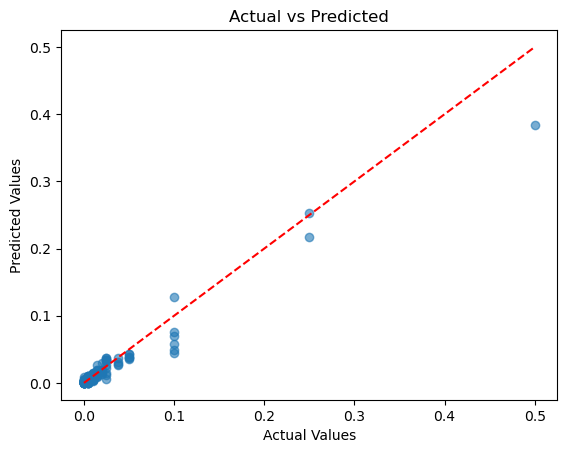

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_rand, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [22]:
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_rand
})
results_df.to_csv("prediction.csv", index= False)